In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/AI/trum_tweet_sentiment_analysis.csv')

## Helper Function for Text Cleaning:

Implement a Helper Function as per Text Preprocessing Notebook and Complete the following pipeline.

# Build a Text Cleaning Pipeline

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

def text_cleaning_pipeline(dataset, rule="lemmatize"):
    """
    This function cleans and preprocesses text data for sentiment analysis.

    Args:
        dataset (str or list): The text data to be cleaned.
        rule (str, optional): The stemming or lemmatization rule to apply. Defaults to "lemmatize".

    Returns:
        str: The cleaned and preprocessed text data.
    """

    # Convert the input to lowercase.
    data = dataset.lower()
    # Remove URLs
    data = re.sub(r'http\S+|www\S+|https\S+', '', data, flags=re.MULTILINE)
    # Remove emojis
    data = data.encode('ascii', 'ignore').decode('ascii')
    # Remove all other unwanted characters.
    data = re.sub(r'\W', ' ', data)
    # Create tokens.
    tokens = nltk.word_tokenize(data)
    # Remove stopwords:
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    if rule == "lemmatize":
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    elif rule == "stem":
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    else:
        print("Pick between lemmatize or stem")

    return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# Text Classification using Machine Learning Models


### 📝 Instructions: Trump Tweet Sentiment Classification

1. **Load the Dataset**  
   Load the dataset named `"trump_tweet_sentiment_analysis.csv"` using `pandas`. Ensure the dataset contains at least two columns: `"text"` and `"label"`.

2. **Text Cleaning and Tokenization**  
   Apply a text preprocessing pipeline to the `"text"` column. This should include:
   - Lowercasing the text  
   - Removing URLs, mentions, punctuation, and special characters  
   - Removing stopwords  
   - Tokenization (optional: stemming or lemmatization)
   - "Complete the above function"

3. **Train-Test Split**  
   Split the cleaned and tokenized dataset into **training** and **testing** sets using `train_test_split` from `sklearn.model_selection`.

4. **TF-IDF Vectorization**  
   Import and use the `TfidfVectorizer` from `sklearn.feature_extraction.text` to transform the training and testing texts into numerical feature vectors.

5. **Model Training and Evaluation**  
   Import **Logistic Regression** (or any machine learning model of your choice) from `sklearn.linear_model`. Train it on the TF-IDF-embedded training data, then evaluate it using the test set.  
   - Print the **classification report** using `classification_report` from `sklearn.metrics`.


In [9]:
# Text Cleaning and Tokenization (Using the previously defined function)
df['cleaned_text'] = df['text'].apply(text_cleaning_pipeline)

In [12]:
# Print the cleaned text of the first tweet from the DataFrame
print(f"Cleaned Tweet (from DataFrame): {df['cleaned_text'][0]}\n")
print("-" * 50)

Cleaned Tweet (from DataFrame): rt johnleguizamo trump draining swamp taxpayer dollar trip advertise property realdonaldtrump

--------------------------------------------------


In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['Sentiment'], test_size=0.2, random_state=42
)
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
# Model Training and Evaluation
model = LogisticRegression()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
# Print Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    248563
           1       0.93      0.91      0.92    121462

    accuracy                           0.95    370025
   macro avg       0.94      0.94      0.94    370025
weighted avg       0.95      0.95      0.95    370025



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Test with the first tweet
test = df["text"][0]
print(f"Original Tweet: {test}\n")
cleaned_test = text_cleaning_pipeline(test)
print(f"Cleaned Tweet: {cleaned_test}\n")
print("-" * 50, "\n")


Original Tweet: RT @JohnLeguizamo: #trump not draining swamp but our taxpayer dollars on his trips to advertise his properties! @realDonaldTrump https://t.co/gFBvUkMX9z

Cleaned Tweet: rt johnleguizamo trump draining swamp taxpayer dollar trip advertise property realdonaldtrump

-------------------------------------------------- 



In [14]:
# Print the cleaned text of the first 5 tweets
for i in range(5):
    print(f"Original Tweet {i+1}: {df['text'][i]}")
    print(f"Cleaned Tweet {i+1}: {df['cleaned_text'][i]}")
    print("-" * 50)

Original Tweet 1: RT @JohnLeguizamo: #trump not draining swamp but our taxpayer dollars on his trips to advertise his properties! @realDonaldTrump https://t.co/gFBvUkMX9z
Cleaned Tweet 1: rt johnleguizamo trump draining swamp taxpayer dollar trip advertise property realdonaldtrump
--------------------------------------------------
Original Tweet 2: ICYMI: Hackers Rig FM Radio Stations To Play Anti-Trump Song https://t.co/fV1J4HbXAt https://t.co/7kwDnuBUUd
Cleaned Tweet 2: icymi hacker rig fm radio station play anti trump song
--------------------------------------------------
Original Tweet 3: Trump protests: LGBTQ rally in New York https://t.co/LfHRD9Ft5I by #BBCWorld via @c0nvey
Cleaned Tweet 3: trump protest lgbtq rally new york bbcworld via c0nvey
--------------------------------------------------
Original Tweet 4: "Hi I'm Piers Morgan. David Beckham is awful but Donald Trump is ok."
Cleaned Tweet 4: hi pier morgan david beckham awful donald trump ok
------------------------------

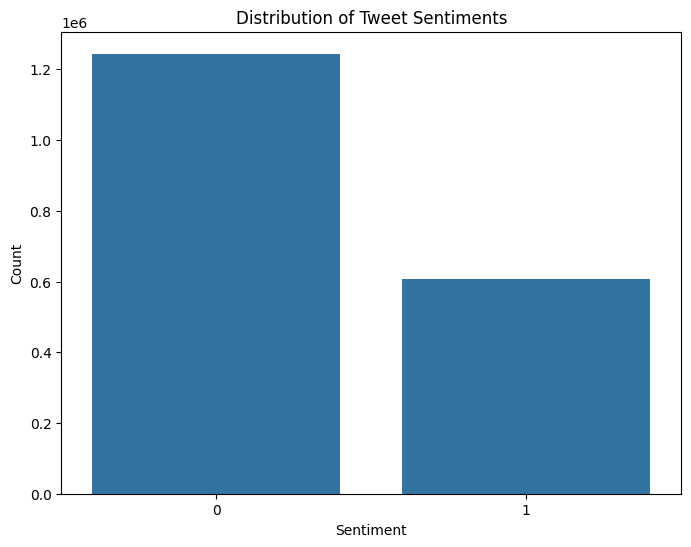

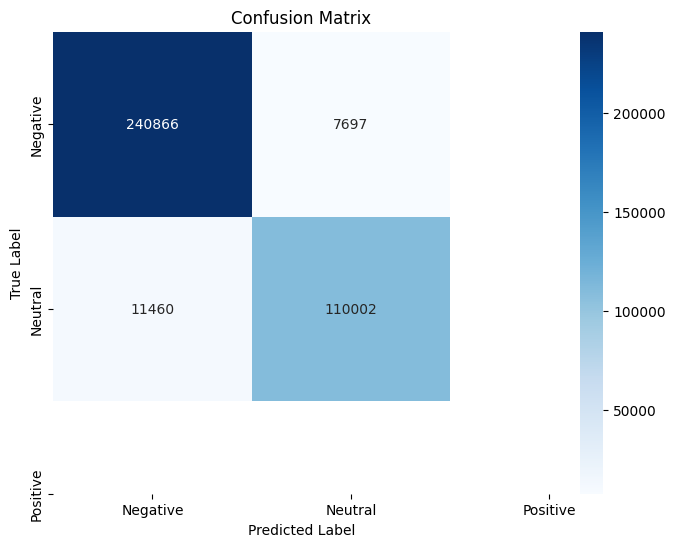

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Tweet Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()